In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/face-expression-recognition-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating:

In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

num_classes = 7
img_rows,img_cols = 48,48
batch_size = 32

train_data_dir = '/content/images/train'
validation_data_dir = '/content/images/validation'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=8

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps= nb_validation_samples//batch_size)



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_44 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_45 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 48, 48, 32)        128       
___________________________________

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def faceDetection(test_img):             
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    face_haar=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') #Give path to haar classifier as i have given
    faces=face_haar.detectMultiScale(gray_img,scaleFactor=1.2,minNeighbors=3)
    return faces,gray_img

In [ ]:
#Here training Classifier is called
def train_classifier(faces,faceID):                              
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    return face_recognizer


#Drawing a Rectangle on the Face Function
def draw_rect(test_img,face):                                      
    (x,y,w,h)=face
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),thickness=3)

#Putting text on images
def put_text(test_img,text,x,y):                                    
    cv2.putText(test_img,text,(x,y),cv2.FONT_HERSHEY_DUPLEX,3,(255,0,0),6)
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

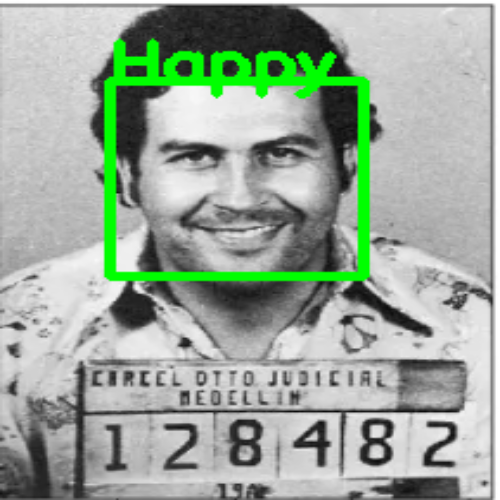

<function destroyAllWindows>

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier =load_model('Emotion_little_vgg.h5')

classifier.summary()

class_labels = ['Angry', 'Happy','Sad', 'Neutral','Surprise']


frame = cv2.imread('Escobar.PNG')  

faces_detected,gray_img= faceDetection(frame)
print("face Detected: ",faces_detected[0])

if faces_detected is not None:
    (x,y,w,h)=faces_detected[0]
    
    roi_gray=gray_img[y:y+h,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds =classifier.predict(roi)

    label=class_labels[preds.argmax()]
    label_position = (x,y)
    draw_rect(frame ,faces_detected[0])
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)


resized_img=cv2.resize(frame,(500,500))
print('Expression Prediction:',label)
cv2_imshow( resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows

Expression Prediction: Sad


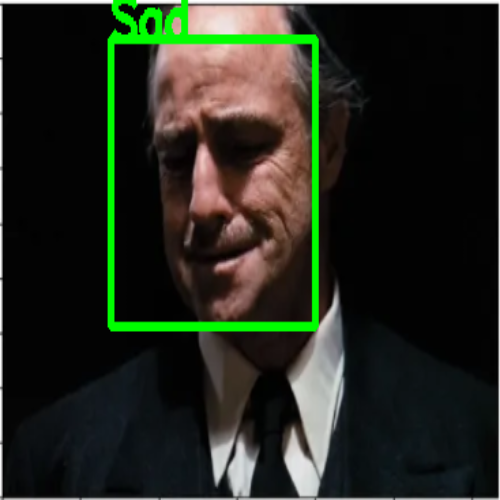

<function destroyAllWindows>

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

class_labels = ['Angry', 'Happy','Sad','Neutral','Surprise']


frame = cv2.imread('Godfather.PNG')  
faces_detected,gray_img= faceDetection(frame)

if faces_detected is not None:
    (x,y,w,h)=faces_detected[0]
    
    roi_gray=gray_img[y:y+h,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds =classifier.predict(roi)

    label=class_labels[preds.argmax()]
    label_position = (x,y)
    draw_rect(frame ,faces_detected[0])
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)


resized_img=cv2.resize(frame,(500,500))
print('Expression Prediction:',label)
cv2_imshow( resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows

Expression Prediction: Angry


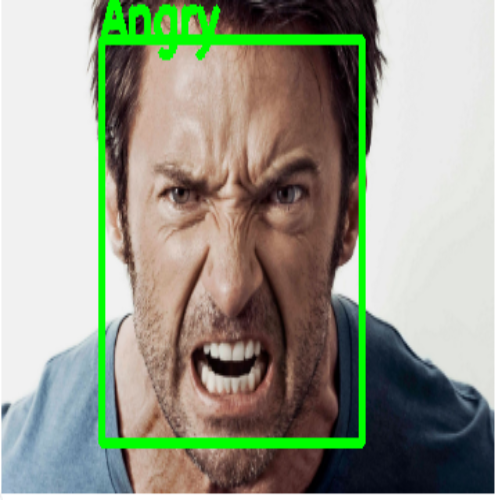

<function destroyAllWindows>

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

class_labels = ['Angry', 'Happy','Sad','Neutral','Surprise']


frame = cv2.imread('Jackman.PNG')  
faces_detected,gray_img= faceDetection(frame)

if faces_detected is not None:
    (x,y,w,h)=faces_detected[0]
    
    roi_gray=gray_img[y:y+h,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds =classifier.predict(roi)

    label=class_labels[preds.argmax()]
    label_position = (x,y)
    draw_rect(frame ,faces_detected[0])
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)


resized_img=cv2.resize(frame,(500,500))
print('Expression Prediction:',label)
cv2_imshow( resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows

Expression Prediction: Angry


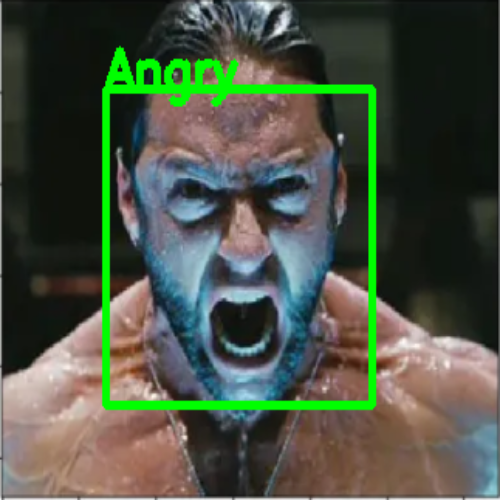

<function destroyAllWindows>

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

class_labels = ['Angry', 'Happy','Sad','Neutral','Surprise']


frame = cv2.imread('Jackman1.PNG')  
faces_detected,gray_img= faceDetection(frame)

if faces_detected is not None:
    (x,y,w,h)=faces_detected[0]
    
    roi_gray=gray_img[y:y+h,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds =classifier.predict(roi)

    label=class_labels[preds.argmax()]
    label_position = (x,y)
    draw_rect(frame ,faces_detected[0])
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)


resized_img=cv2.resize(frame,(500,500))
print('Expression Prediction:',label)
cv2_imshow( resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows

Expression Prediction: Neutral


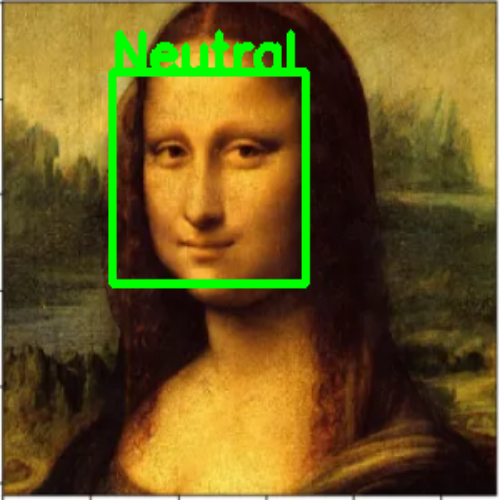

<function destroyAllWindows>

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

class_labels = ['Angry', 'Happy','Sad', 'Neutral','Surprise']



frame = cv2.imread('Monalisa.PNG')  
faces_detected,gray_img= faceDetection(frame)

if faces_detected is not None:
    (x,y,w,h)=faces_detected[0]
    
    roi_gray=gray_img[y:y+h,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi = roi_gray.astype('float')/255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi,axis=0)
    preds =classifier.predict(roi)

    label=class_labels[preds.argmax()]
    label_position = (x,y)
    draw_rect(frame ,faces_detected[0])
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)


resized_img=cv2.resize(frame,(500,500))
print('Expression Prediction:',label)
cv2_imshow( resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows